In [1]:
# Packages!!!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in the data
data = pd.read_csv('FullTest.csv')
df = data.copy()
df.head()

,Attention Endorsement,Escape Endorsement,NS Endorsement,Tang Endorsement,Attention Intensity,Escape Intensity,NS Intensity,Tang Intensity,Attention FA,Escape FA,NS FA,Tang FA,Classification
0,4,4,1,5,9,12,1,15,0,1,0,1,ET
1,5,4,0,4,15,12,0,12,0,1,0,1,ET
2,5,5,1,2,14,15,1,6,1,1,0,0,AE
3,1,5,0,5,2,15,0,15,0,1,0,1,ET
4,0,1,5,1,0,2,14,1,0,0,1,0,N


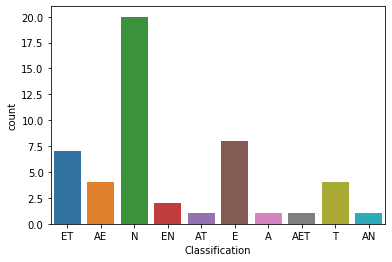

In [3]:
# What do these counts look like, exactly?
ax = sns.countplot(x="Classification", data=df)

### Example less complex model using the swiss army knife that is Random Forest. 

In [4]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.decomposition import PCA

In [5]:
#%% Define functions
def bin_metrics(x, y):
    '''Prints four common metrics for evaluating classification predictions.'''
    print('Accuracy:', round(metrics.accuracy_score(x, y), 4))
    print('Precision:', round(metrics.precision_score(x, y, average='weighted'), 4))
    print('Recall:', round(metrics.recall_score(x, y, average='weighted'), 4))
    print('F1:', round(metrics.f1_score(x, y, average='weighted'), 4))

def plot_cm(x, y):
    plt.subplots(figsize=(12, 10))
    cm = confusion_matrix(x, y)
    df_cm = pd.DataFrame(cm, columns=np.unique(x), index = np.unique(x))
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20}, fmt='g')# font size
    plt.ylim([0, 4])
    plt.xlabel('Predicted', fontsize=30)
    plt.ylabel('Observed', fontsize=30)

### Break data into feature and target dfs. 

In [6]:
outcomes = ['Attention FA', 'Escape FA', 'NS FA', 'Tang FA', 'Classification']
target = df['Classification'].astype('category').cat.codes
predictors = df.drop(outcomes, axis=1)

In [7]:
# Recode target cat as numerical for ML algorithms
target = target.astype('category')
target = target.cat.codes

### Classify it up

Max Accuracy: 1.0
Max F1: 1.0


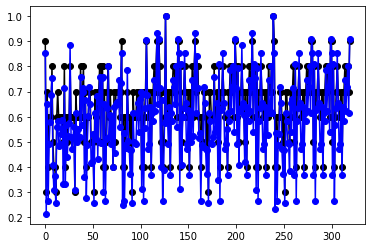

In [8]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
acc_scores = []
f1_scores = []
nEst_range = [10, 50, 100, 1000]
depth_range = [2, 5, 10, 100]
rand_state = list(range(0, 20))
for i in nEst_range:
    for k in depth_range:
        for j in rand_state:
            X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.20, random_state = j)
            classifier = RandomForestClassifier(n_estimators=i, max_depth=k)
            classifier.fit(X_train, y_train)
            pred_train= classifier.predict(X_train)
            pred_test= classifier.predict(X_test)
            acc_val = metrics.accuracy_score(y_test, pred_test)
            acc_scores.append(acc_val)
            f1_val = f1_score(y_test, pred_test, average='weighted')
            f1_scores.append(f1_val)
plt.plot(acc_scores, marker='o', color='black')
plt.plot(f1_scores, marker='o', color='blue')
print("Max Accuracy:", round(max(acc_scores), 2))
print('Max F1:', round(max(f1_scores), 2))